In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler


## Parkinsons Data Set


El conjunto de datos fue creado por Max Little de la Universidad de Oxford, en colaboración con el Centro Nacional para la Voz y el Habla, Denver, Colorado, que registró las señales del habla. El estudio original publicó los métodos de extracción de características para los trastornos generales de la voz.

https://archive.ics.uci.edu/ml/datasets/parkinsons

### Información 

Este conjunto de datos se compone de una variedad de mediciones de voz biomédicas de 31 personas, 23 con enfermedad de Parkinson (EP). Cada columna de la tabla es una medida de voz particular, y cada fila corresponde a una de las 195 grabaciones de voz de estos individuos (columna "nombre"). El objetivo principal de los datos es discriminar a las personas sanas de las que padecen EP, según la columna de "estado", que se establece en 0 para personas sanas y 1 para EP.

Los datos están en formato ASCII CSV. Las filas del archivo CSV contienen una instancia correspondiente a una grabación de voz. Hay alrededor de seis grabaciones por paciente, el nombre del paciente se identifica en la primera columna. Para obtener más información o enviar comentarios, comuníquese con Max Little (pequeño '@' robots.ox.ac.uk).


In [2]:
df=pd.read_csv("parkinsons2.data")
df

name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0    phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1    phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2    phon_R01_S01_3      116.682       131.111       111.555         0.01050   
3    phon_R01_S01_4      116.676       137.871       111.366         0.00997   
4    phon_R01_S01_5      116.014       141.781       110.655         0.01284   
..              ...          ...           ...           ...             ...   
190  phon_R01_S50_2      174.188       230.978        94.261         0.00459   
191  phon_R01_S50_3      209.516       253.017        89.488         0.00564   
192  phon_R01_S50_4      174.688       240.005        74.287         0.01360   
193  phon_R01_S50_5      198.764       396.961        74.904         0.00740   
194  phon_R01_S50_6      214.289       260.277        77.973         0.00567   

     MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  ...  \
0             0.00007   0.00370   0.00554     0.01109       0.04374  ...   
1             0.00008   0.00465   0.00696     0.01394       0.06134  ...   
2             0.00009   0.00544   0.00781     0.01633       0.05233  ...   
3             0.00009   0.00502   0.00698     0.01505       0.05492  ...   
4             0.00011   0.00655   0.00908     0.01966       0.06425  ...   
..                ...       ...       ...         ...           ...  ...   
190           0.00003   0.00263   0.00259     0.00790       0.04087  ...   
191           0.00003   0.00331   0.00292     0.00994       0.02751  ...   
192           0.00008   0.00624   0.00564     0.01873       0.02308  ...   
193           0.00004   0.00370   0.00390     0.01109       0.02296  ...   
194           0.00003   0.00295   0.00317     0.00885       0.01884  ...   

     Shimmer:DDA      NHR     HNR  status      RPDE       DFA   spread1  \
0        0.06545  0.02211  21.033       1  0.414783  0.815285 -4.813031   
1        0.09403  0.01929  19.085       1  0.458359  0.819521 -4.075192   
2        0.08270  0.01309  20.651       1  0.429895  0.825288 -4.443179   
3        0.08771  0.01353  20.644       1  0.434969  0.819235 -4.117501   
4        0.10470  0.01767  19.649       1  0.417356  0.823484 -3.747787   
..           ...      ...     ...     ...       ...       ...       ...   
190      0.07008  0.02764  19.517       0  0.448439  0.657899 -6.538586   
191      0.04812  0.01810  19.147       0  0.431674  0.683244 -6.195325   
192      0.03804  0.10715  17.883       0  0.407567  0.655683 -6.787197   
193      0.03794  0.07223  19.020       0  0.451221  0.643956 -6.744577   
194      0.03078  0.04398  21.209       0  0.462803  0.664357 -5.724056   

      spread2        D2       PPE  
0    0.266482  2.301442  0.284654  
1    0.335590  2.486855  0.368674  
2    0.311173  2.342259  0.332634  
3    0.334147  2.405554  0.368975  
4    0.234513  2.332180  0.410335  
..        ...       ...       ...  
190  0.121952  2.657476  0.133050  
191  0.129303  2.784312  0.168895  
192  0.158453  2.679772  0.131728  
193  0.207454  2.138608  0.123306  
194  0.190667  2.555477  0.148569  

[195 rows x 24 columns]

* **name**:nombre del sujeto ASCII y número de grabación


* **MDVP:Fo(Hz)**: Frecuencia fundamental vocal promedio


* **MDVP:Fhi(Hz)**: Frecuencia fundamental vocal máxima


* **MDVP:Flo(Hz)**: Frecuencia fundamental vocal mínima


* **MDVP: Jitter (%), MDVP: Jitter (Abs), MDVP: RAP, MDVP: PPQ, Jitter: DDP:** : Varias medidas de variación en la frecuencia fundamental

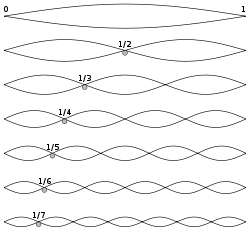


* **MDVP:Shimmer, MDVP:Shimmer(dB), Shimmer:APQ3, Shimmer:APQ5, MDVP:APQ, Shimmer:DDA**: Varias medidas de variación en amplitud


* **NHR, HNR**:Dos medidas de relación de ruido a componentes tonales en la voz


* **status**:Estado de salud del sujeto (uno) - Parkinson, (cero) - saludable


* **RPDE, D2**:Dos medidas de complejidad dinámica no lineal


* **DFA**: Exponente de escala de fractal de señal


* **spread1, spread2, PPE**: Tres medidas no lineales de variación de frecuencia fundamental




In [3]:
df.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [4]:
df.dtypes

name                 object
MDVP:Fo(Hz)         float64
MDVP:Fhi(Hz)        float64
MDVP:Flo(Hz)        float64
MDVP:Jitter(%)      float64
MDVP:Jitter(Abs)    float64
MDVP:RAP            float64
MDVP:PPQ            float64
Jitter:DDP          float64
MDVP:Shimmer        float64
MDVP:Shimmer(dB)    float64
Shimmer:APQ3        float64
Shimmer:APQ5        float64
MDVP:APQ            float64
Shimmer:DDA         float64
NHR                 float64
HNR                 float64
status                int64
RPDE                float64
DFA                 float64
spread1             float64
spread2             float64
D2                  float64
PPE                 float64
dtype: object

In [5]:
df.describe()

MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
count   195.000000    195.000000    195.000000      195.000000   
mean    154.228641    197.104918    116.324631        0.006220   
std      41.390065     91.491548     43.521413        0.004848   
min      88.333000    102.145000     65.476000        0.001680   
25%     117.572000    134.862500     84.291000        0.003460   
50%     148.790000    175.829000    104.315000        0.004940   
75%     182.769000    224.205500    140.018500        0.007365   
max     260.105000    592.030000    239.170000        0.033160   

       MDVP:Jitter(Abs)    MDVP:RAP    MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
count        195.000000  195.000000  195.000000  195.000000    195.000000   
mean           0.000044    0.003306    0.003446    0.009920      0.029709   
std            0.000035    0.002968    0.002759    0.008903      0.018857   
min            0.000007    0.000680    0.000920    0.002040      0.009540   
25%            0.000020    0.001660    0.001860    0.004985      0.016505   
50%            0.000030    0.002500    0.002690    0.007490      0.022970   
75%            0.000060    0.003835    0.003955    0.011505      0.037885   
max            0.000260    0.021440    0.019580    0.064330      0.119080   

       MDVP:Shimmer(dB)  ...  Shimmer:DDA         NHR         HNR      status  \
count        195.000000  ...   195.000000  195.000000  195.000000  195.000000   
mean           0.282251  ...     0.046993    0.024847   21.885974    0.753846   
std            0.194877  ...     0.030459    0.040418    4.425764    0.431878   
min            0.085000  ...     0.013640    0.000650    8.441000    0.000000   
25%            0.148500  ...     0.024735    0.005925   19.198000    1.000000   
50%            0.221000  ...     0.038360    0.011660   22.085000    1.000000   
75%            0.350000  ...     0.060795    0.025640   25.075500    1.000000   
max            1.302000  ...     0.169420    0.314820   33.047000    1.000000   

             RPDE         DFA     spread1     spread2          D2         PPE  
count  195.000000  195.000000  195.000000  195.000000  195.000000  195.000000  
mean     0.498536    0.718099   -5.684397    0.226510    2.381826    0.206552  
std      0.103942    0.055336    1.090208    0.083406    0.382799    0.090119  
min      0.256570    0.574282   -7.964984    0.006274    1.423287    0.044539  
25%      0.421306    0.674758   -6.450096    0.174351    2.099125    0.137451  
50%      0.495954    0.722254   -5.720868    0.218885    2.361532    0.194052  
75%      0.587562    0.761881   -5.046192    0.279234    2.636456    0.252980  
max      0.685151    0.825288   -2.434031    0.450493    3.671155    0.527367  

[8 rows x 23 columns]

In [6]:
pk=df.iloc[:, (df.columns != 'name')]
X=df.iloc[:, (df.columns != 'status') & (df.columns != 'name')]
y=df["status"]

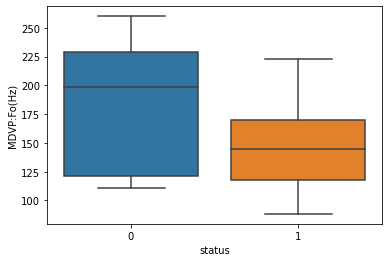

In [7]:
import seaborn as sb
sb.boxplot(x = "status", y = "MDVP:Fo(Hz)", data = pk)
plt.show()

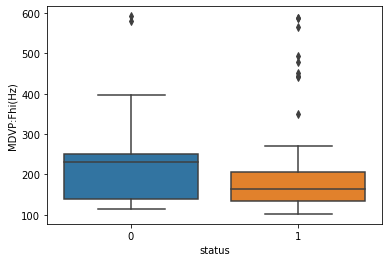

In [8]:
import seaborn as sb
sb.boxplot(x = "status", y = "MDVP:Fhi(Hz)", data = pk)
plt.show()

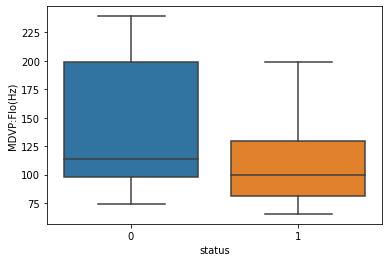

In [9]:
import seaborn as sb
sb.boxplot(x = "status", y = "MDVP:Flo(Hz)", data = pk)
plt.show()

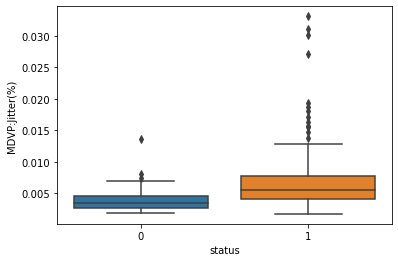

In [10]:
import seaborn as sb
sb.boxplot(x = "status", y = "MDVP:Jitter(%)", data = pk)
plt.show()

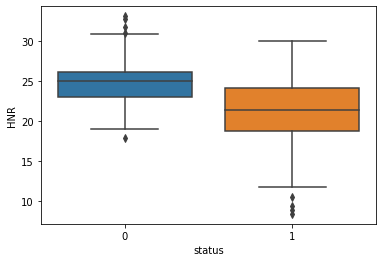

In [11]:
sb.boxplot(x = "status", y = "HNR", data = pk)
plt.show()

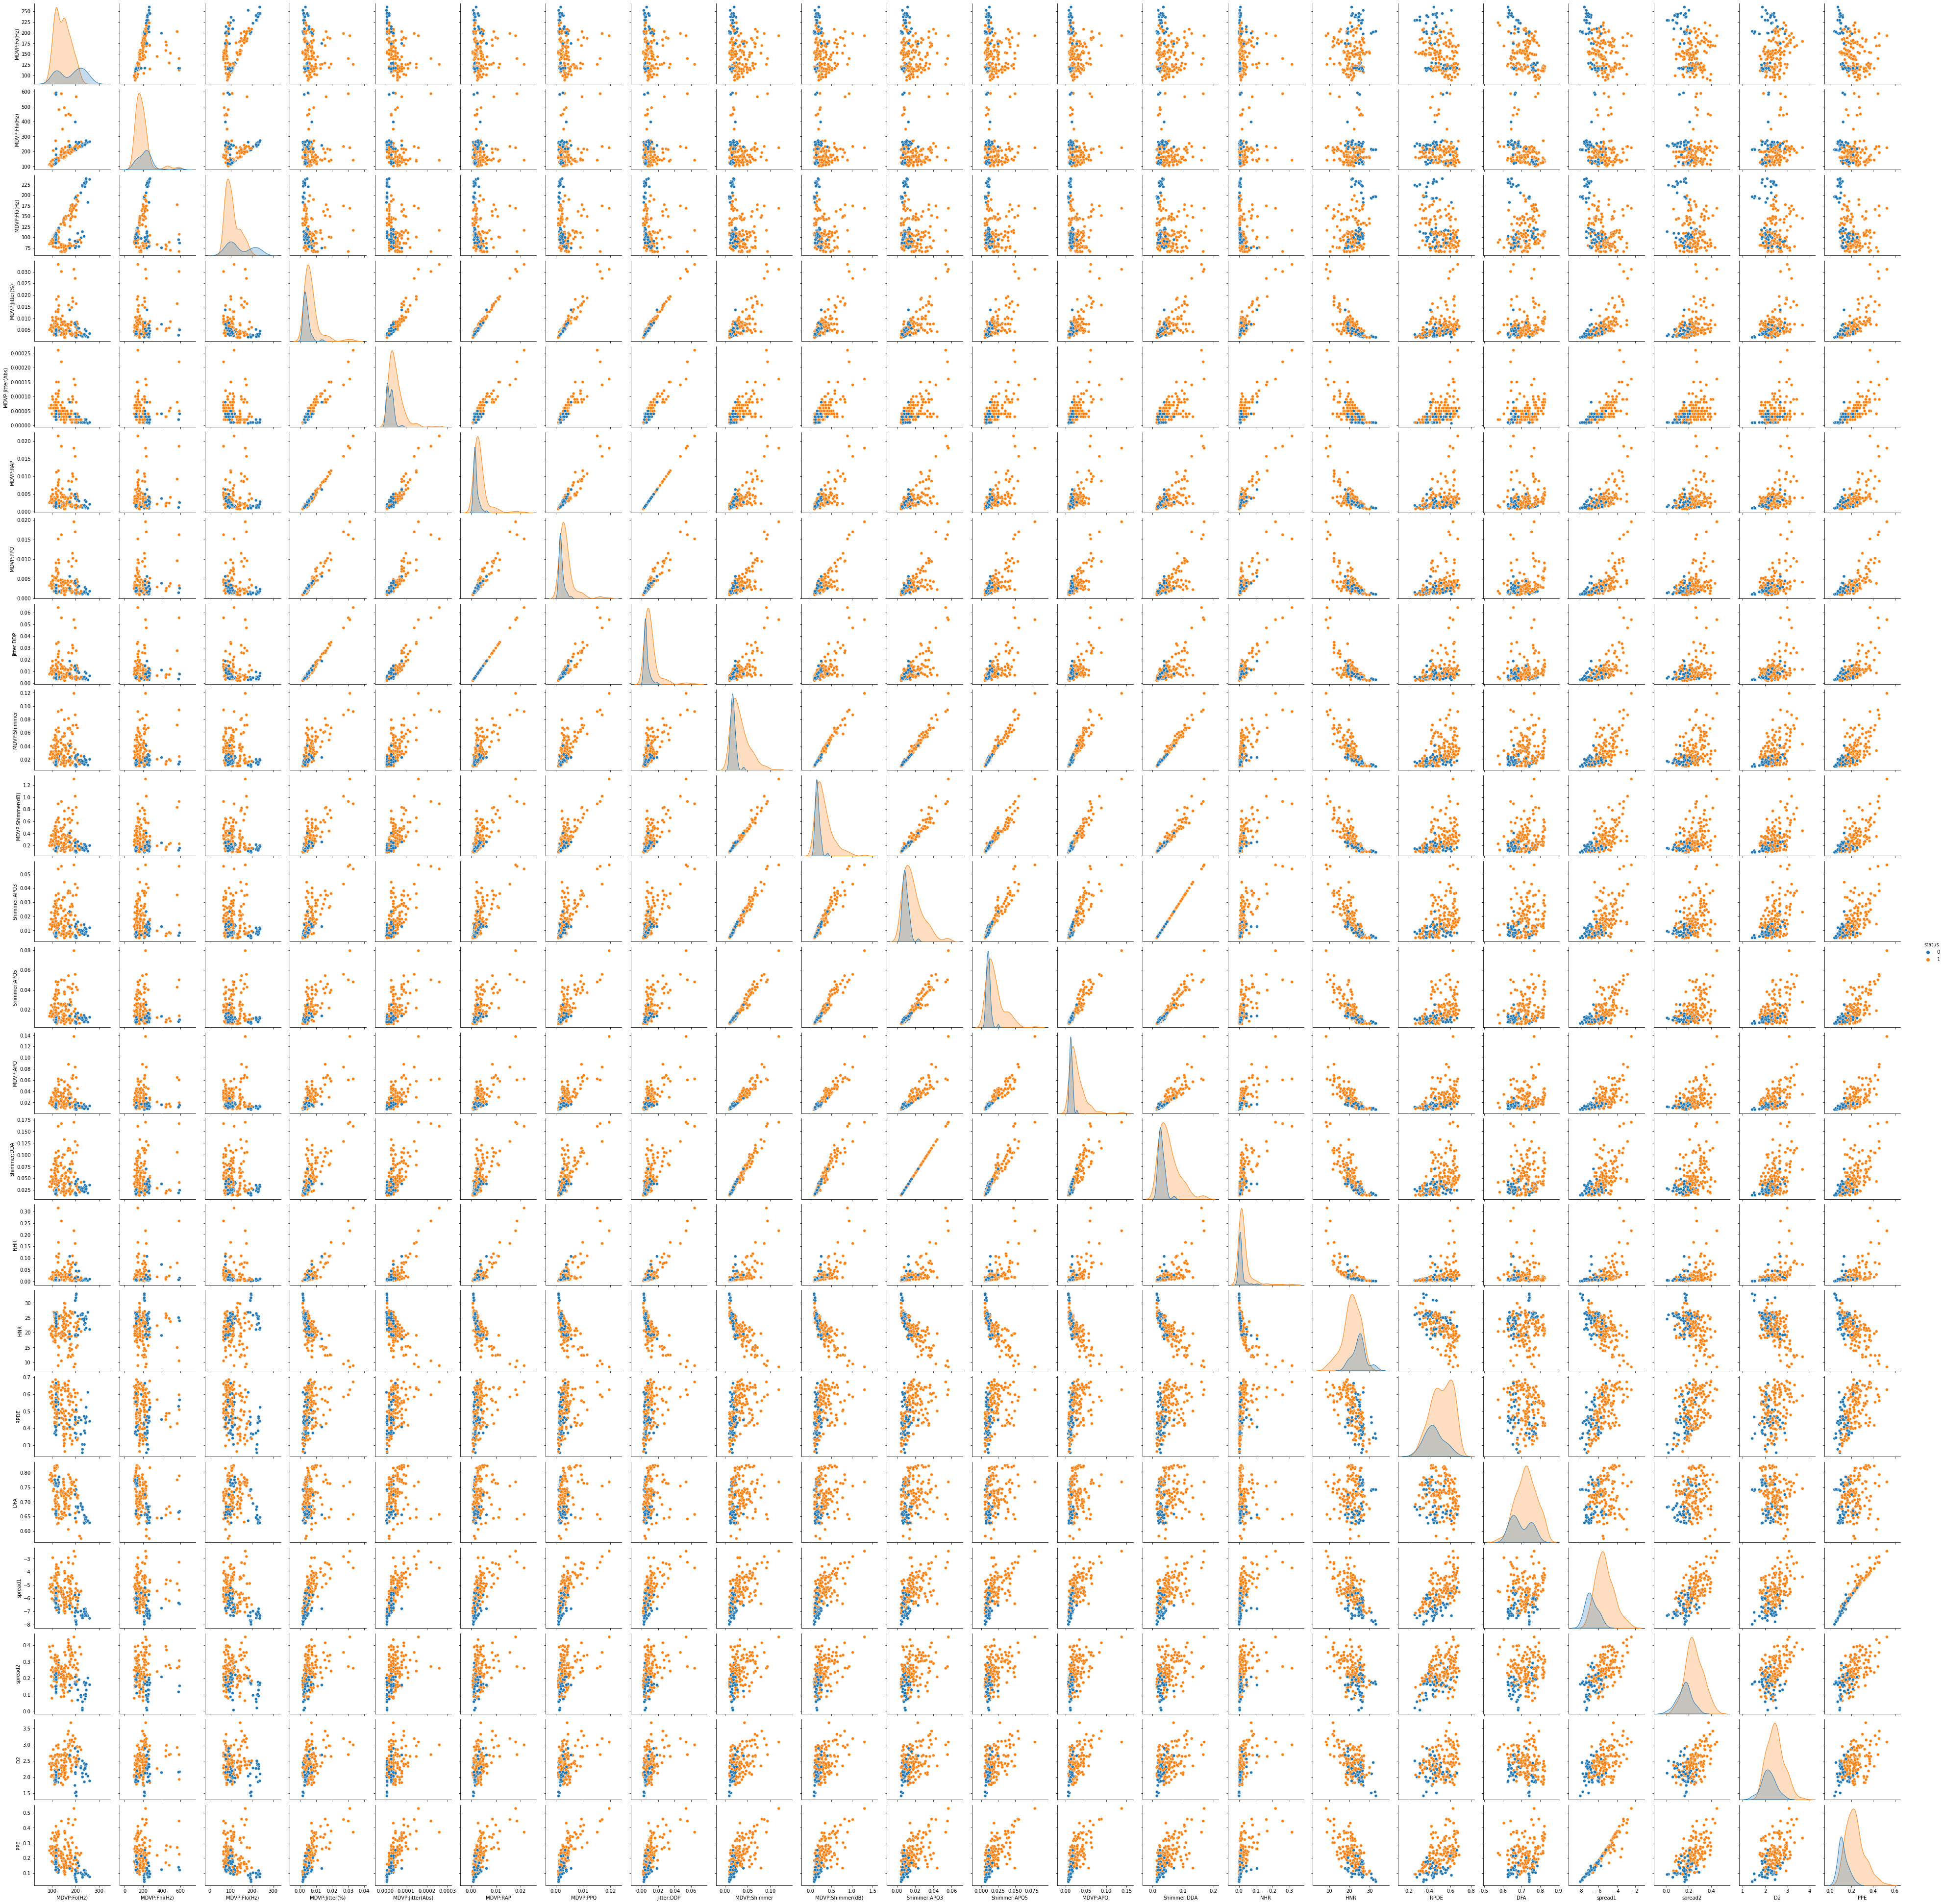

In [12]:
sns.pairplot(pk, hue="status")
plt.savefig("pairplotParkinson.jpg")


#### Correlación

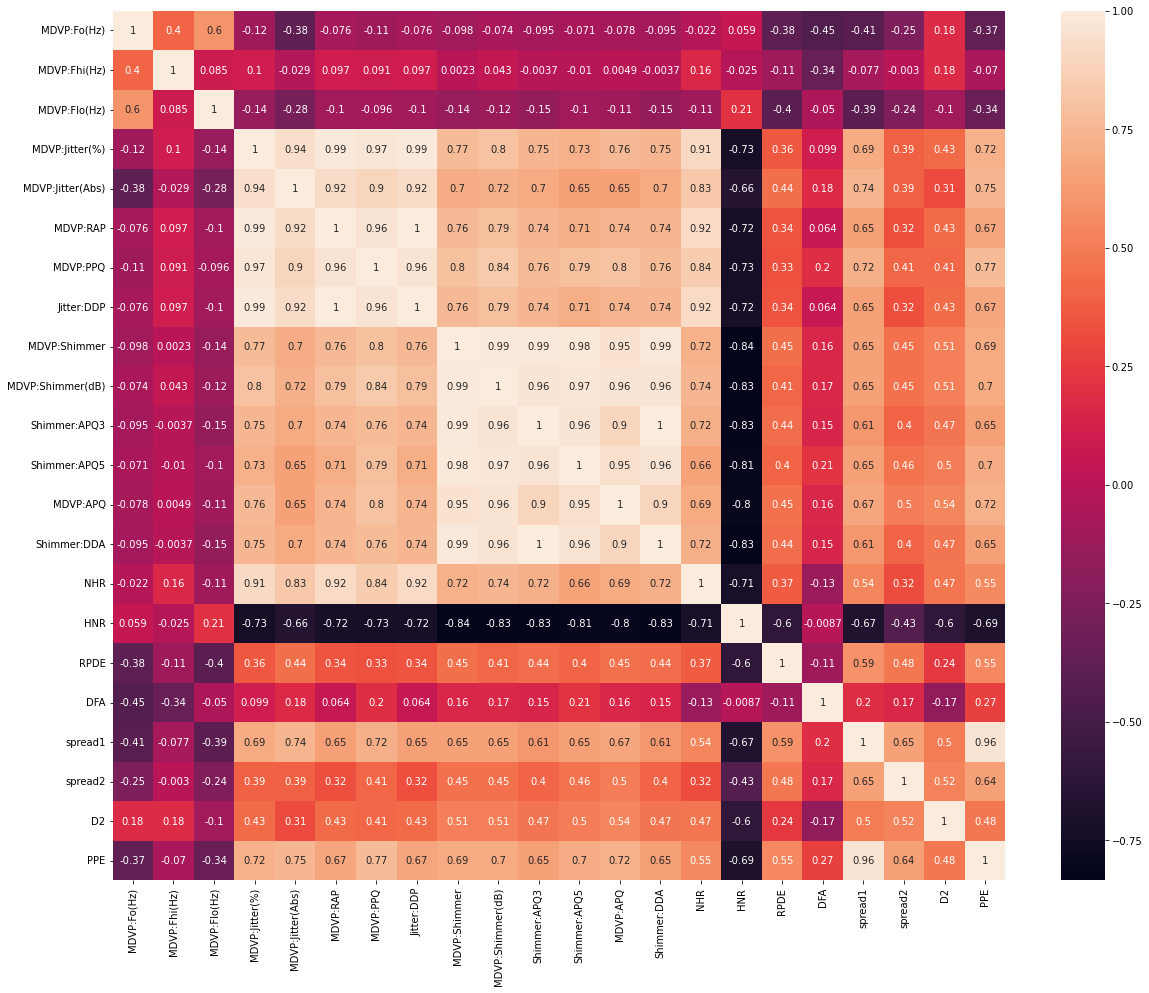

In [13]:
plt.figure(figsize=(20, 16)) 
sns.heatmap(X.corr(), annot=True)
plt.savefig("corrParkinson.jpg")

Podemos ver que se tienen muchas correlaciones, positivas y negativas por lo cual considero que se puede utilizar PCA

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

scaler = StandardScaler()
X_std=scaler.fit_transform(X)

In [15]:
pca = PCA()
pca.fit(X_std)
evr = pca.explained_variance_ratio_

print(evr)

print(evr.cumsum())

[5.89005041e-01 1.12994301e-01 7.00922613e-02 6.65902818e-02
 4.42689134e-02 3.31412915e-02 2.51020405e-02 1.64728788e-02
 1.31744611e-02 1.01875582e-02 6.38932478e-03 4.76551508e-03
 3.16986041e-03 1.73483094e-03 1.00053149e-03 8.08524478e-04
 5.66199903e-04 3.27915264e-04 1.58934882e-04 4.93161572e-05
 1.64470280e-08 1.50562914e-09]
[0.58900504 0.70199934 0.7720916  0.83868189 0.8829508  0.91609209
 0.94119413 0.95766701 0.97084147 0.98102903 0.98741835 0.99218387
 0.99535373 0.99708856 0.99808909 0.99889762 0.99946382 0.99979173
 0.99995067 0.99999998 1.         1.        ]


Nos quedamos con 5 componentes(0.8829508%)

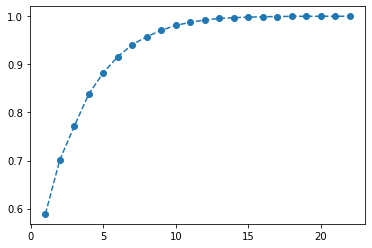

In [16]:
plt.plot(range(1, len(X.columns)+1), evr.cumsum(), marker='o', linestyle='--')
plt.show()

In [17]:
#splitting into train and test set
X_train,X_test,y_train,y_test = train_test_split(X_std,y, test_size = 0.2, random_state =0)

In [18]:
pca = PCA(n_components = 6)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

Se realiza un biplot para poner analizar graficamente los componentes

In [19]:
def biplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()

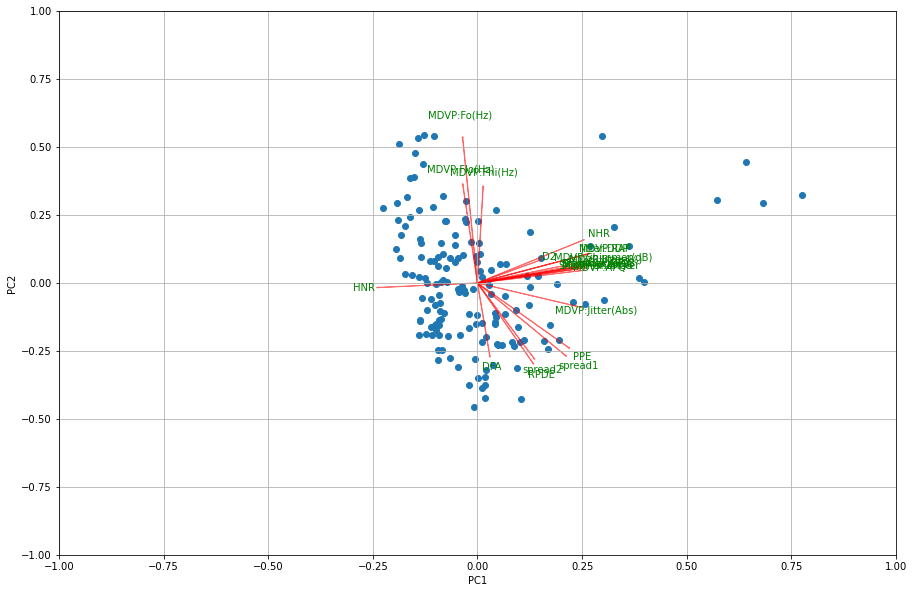

In [20]:
fig = plt.figure(figsize =(15, 10))
biplot(X_train[:,0:2],np.transpose(pca.components_[0:2, :]), X.columns)
plt.show()

* **name**:nombre del sujeto ASCII y número de grabación


* **MDVP:Fo(Hz)**: Frecuencia fundamental vocal promedio


* **MDVP:Fhi(Hz)**: Frecuencia fundamental vocal máxima


* **MDVP:Flo(Hz)**: Frecuencia fundamental vocal mínima


* **MDVP: Jitter (%), MDVP: Jitter (Abs), MDVP: RAP, MDVP: PPQ, Jitter: DDP:** : Varias medidas de variación en la frecuencia fundamental


* **MDVP:Shimmer, MDVP:Shimmer(dB), Shimmer:APQ3, Shimmer:APQ5, MDVP:APQ, Shimmer:DDA**: Varias medidas de variación en amplitud


* **NHR, HNR**:Dos medidas de relación de ruido a componentes tonales en la voz


* **status**:Estado de salud del sujeto (uno) - Parkinson, (cero) - saludable


* **RPDE, D2**:Dos medidas de complejidad dinámica no lineal


* **DFA**: Exponente de escala de fractal de señal


* **spread1, spread2, PPE**: Tres medidas no lineales de variación de frecuencia fundamental



In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score

In [27]:
clf = LogisticRegression()
clf.fit(X_train, y_train)


y_pred = clf.predict(X_test) # Predictions
y_pred

array([1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1], dtype=int64)


Test confusion_matrix
0.8717948717948718


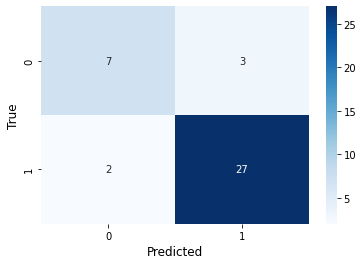

In [23]:
cf_matrix = confusion_matrix(y_test, y_pred)
print("\nTest confusion_matrix")
sns.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('True', fontsize=12)
print(accuracy_score(y_test, y_pred))

In [25]:
clf = KNeighborsClassifier(n_neighbors = 3)
clf.fit(X_train,y_train)

y2_pred = clf.predict(X_test)
y2_pred

array([0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)


Test confusion_matrix
0.9230769230769231


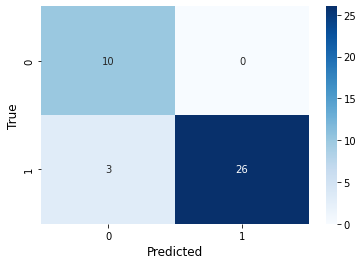

In [26]:
cf_matrix = confusion_matrix(y_test, y2_pred)
print("\nTest confusion_matrix")
sns.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('True', fontsize=12)
print(accuracy_score(y_test, y2_pred))